<H1>Principal component analysis</H1>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
# load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
features = ['sepal_length','sepal_width','petal_length','petal_width','target']
df = pd.read_csv(url, names = features)
df.head() # show 5 first entries

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<H2>Data standarization</H2>
<P>The mean of every feature must be zero, and the standard deviation 1</P>

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
# extract features
features = ['sepal_length','sepal_width','petal_length','petal_width']
x = df.loc[:, features].values 
y = df.loc[:,['target']].values

In [6]:
# Standarize features
stdx = StandardScaler().fit_transform(x)
stdDf = pd.DataFrame(data = stdx, columns = features)
pd.concat([stdDf, df['target']], axis=1).head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


<H2>Principal component analysis into two dimensions </H2>

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(stdx)
pcDf = pd.DataFrame(data = principalComponents, columns =['PC1', 'PC2'])
finalDf = pd.concat([pcDf, df['target']], axis=1)
finalDf.head()

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [11]:
var1, var2 = pca.explained_variance_ratio_
print('The first component contains %2.4f %% of the variance'%var1)
print('The second component containts %2.4f %% of the variance'%var2)
print('Total variance explained %2.4f %% '%(var1+var2))

The first component contains 0.7277 % of the variance
The second component containts 0.2303 % of the variance
Total variance explained 0.9580 % 


<H2>Plot everything</H2>

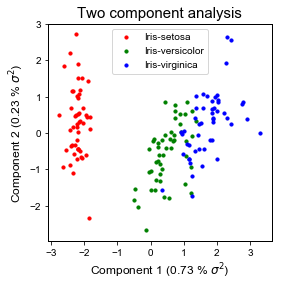

In [22]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111) 
xlabel = 'Component 1 (%2.2f %% $\sigma^2$)'%var1
ylabel = 'Component 2 (%2.2f %% $\sigma^2$)'%var2
ax.set_xlabel(xlabel, fontsize = 12)
ax.set_ylabel(ylabel, fontsize = 12)
ax.set_title('Two component analysis', fontsize = 15)
mytargets = np.unique(df['target'].values).tolist()
colors = ['r', 'g', 'b']
for target, color in zip(mytargets,colors):
    mytarget = finalDf['target'] == target
    ax.scatter(finalDf.loc[mytarget, 'PC1']
               , finalDf.loc[mytarget, 'PC2']
               , c = color
               , s = 10)
ax.legend(mytargets)
#ax.grid()